In [20]:
import torch
from torch import nn
from torch.nn import functional as F
import dltools


In [21]:
batch_size,num_steps = 32,35
train_iter,vocab = dltools.load_data_time_machine(batch_size,num_steps)


In [22]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab),num_hiddens)


In [23]:
state = torch.zeros((1,batch_size,num_hiddens))
X = torch.rand(size=(num_steps,batch_size,len(vocab)))
Y,state = rnn_layer(X,state)

In [24]:
class RNNModel(nn.Module):
    def __init__(self, rnn_layer,vocab_size,**kwargs):
        super().__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size

        if not self.rnn.bidirectional:
            self.num_directioons = 1
            self.linear = nn.Linear(self.num_hiddens,self.vocab_size)
        else:
            self.num_directioons = 2
            self.linear = nn.Linear(self.num_hiddens*2,self.vocab_size)

    def forward(self,inputs,state):
        X = F.one_hot(inputs.T.long(),self.vocab_size)
        X=X.to(torch.float32)
        Y,state = self.rnn(X,state)
        output = self.linear(Y.reshape(-1,Y.shape[-1]))
        return output,state
    def begin_state(self,device,batch_size =1):
        return torch.zeros((self.num_directioons * self.rnn.num_layers,batch_size,self.num_hiddens),device = device)



In [25]:
device = dltools.try_gpu()
net = RNNModel(rnn_layer,vocab_size=len(vocab))
net = net.to(device)
dltools.predict_ch8('time traveller',10,net,vocab,device)

'time travellergmtgmmmmmm'

perplexity 1.3, 433294.9 tokens/sec on cuda:0
time traveller arter three able med the medcungutand thatt bling
travellers mo ne move about in the other dimensions and the


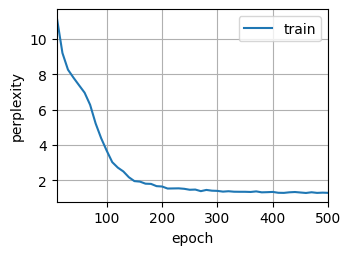

In [26]:
num_epochs,lr = 500,1
dltools.train_ch8(net,train_iter,vocab,lr,num_epochs,device)